In [1]:
import os 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from tensorflow.keras import layers, models, datasets, optimizers

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [23]:
x_train = np.expand_dims(x_train, axis=-1)   # -> (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test,  axis=-1)

In [24]:
from tensorflow.keras.applications import VGG16

## preprocessing the data

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
x_test.shape

(10000, 28, 28, 1)

In [27]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1, 
    horizontal_flip=True
)

In [28]:
train_data_gen

In [29]:
test_data_gen = ImageDataGenerator(
    rescale=1./255
)

In [56]:
X_train_resized = tf.image.resize(x_train, [32, 32])
X_test_resized = tf.image.resize(x_test, [32, 32])

#VGG16 accepts rgb. Tyasaile, grayscale to rgb
X_train_rgb = tf.image.grayscale_to_rgb(X_train_resized)
X_test_rgb = tf.image.grayscale_to_rgb(X_test_resized)

x_train = X_train_rgb
x_test = X_test_rgb

ValueError: Last dimension of a grayscale image should be size 1.

In [43]:
from sklearn.preprocessing import LabelEncoder
y_train = LabelEncoder().fit_transform(y_train)

In [44]:
y_test = LabelEncoder().fit_transform(y_test)

In [45]:
train_data = train_data_gen.flow(x_train, y_train)

In [46]:
test_data = test_data_gen.flow(x_test, y_test)

## Model building with VGG16

In [51]:
def build_modelVGG16():
    base_model = VGG16(weights = 'imagenet',include_top=False, input_shape = (32, 32, 3))
    base_model.trainable = False
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation = 'relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs = base_model.input, outputs = predictions)
    return model

In [52]:
model = build_modelVGG16()
model.compile(optimizer = optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [54]:
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test), verbose = True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9580 - loss: 0.1295 - val_accuracy: 0.9694 - val_loss: 0.0902
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 55ms/step - accuracy: 0.9607 - loss: 0.1207 - val_accuracy: 0.9718 - val_loss: 0.0884
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9625 - loss: 0.1169 - val_accuracy: 0.9740 - val_loss: 0.0830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9622 - loss: 0.1155 - val_accuracy: 0.9767 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 55ms/step - accuracy: 0.9650 - loss: 0.1090 - val_accuracy: 0.9746 - val_loss: 0.0828


The code above was re-ran

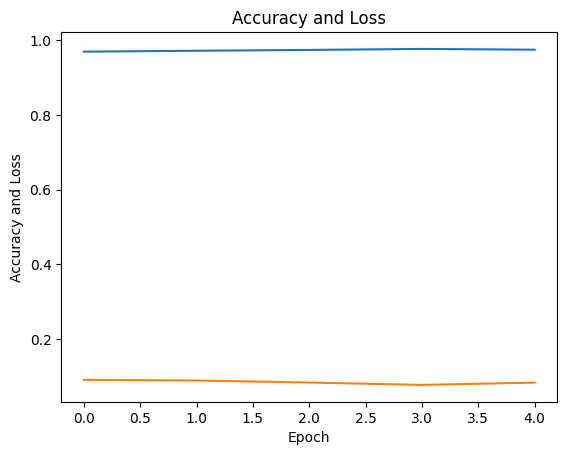

In [55]:
plt.plot(history.history['val_accuracy'], label = "Accuracy")
plt.plot(history.history['val_loss'], label = "Loss")
plt.title("Accuracy and Loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy and Loss')
plt.show()